In [1]:
# 导入需要的包
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


### Example 3.1

读入NAO数据，并做图查看

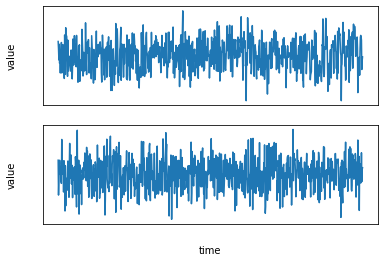

样本均值: -0.00126477541371158
样本标准差: 1.0197838195622762


In [2]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/NAO.csv",skiprows=1)
data_np=np.array(data)
ts=np.zeros(len(data_np))
for i in range(len(data_np)):
    ts[i]=data_np[i][1]
white_noise=np.random.standard_normal(size=len(ts))
ax1 = plt.subplot(2, 1, 1) # 两行一列，位置是1的子图
plt.plot(ts)
plt.ylabel('value')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
ax2 = plt.subplot(2, 1, 2) # 两行一列，位置是1的子图
plt.plot(white_noise)
plt.ylabel('value')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
mean=np.mean(ts)
std=np.std(ts)
print('样本均值:',mean)
print('样本标准差:',std)

直观上看，时间序列是平稳的，且类似于正态随机样本，为了检验该序列的非正态性，计算JB统计量；同时进行ADF检验，确定其平稳性：

In [3]:
# JB=acorr_ljungbox(ts,boxpierce=True)
JB=stats.jarque_bera(ts)
print('JB统计量为:',JB[0])
print('JB检验的p值为:',JB[1])
print('时间序列的adf检验',statsmodels.tsa.stattools.adfuller(ts))

JB统计量为: 6.423236053517906
JB检验的p值为: 0.040291367990396454
时间序列的adf检验 (-23.57959005687949, 0.0, 0, 845, {'1%': -3.4381124572018487, '5%': -2.864966469499829, '10%': -2.5685945257518994}, 2339.7008333544936)


JB统计量为6.4，对应的p值小于0.05，因此显著区别于标准正态分布。且时间序列通过了ADF检验，是平稳的。

为了确定数据符合的模型及模型的阶数，下面计算自相关系数和偏自相关系数：

[ 1.          0.20561431  0.06887567  0.02316993 -0.03852645  0.02548379
 -0.0102671  -0.01723469  0.00224895  0.03555196  0.04181439  0.0285454
  0.04559929  0.0668967  -0.01075852 -0.03198663 -0.08406801 -0.02299225
 -0.04056964  0.02363251  0.01184981 -0.03225626  0.01740782  0.06099473
  0.07226015  0.07832142  0.05402499  0.05753226  0.00664429  0.00964236
  0.01669299  0.00365886  0.03681364  0.04890534  0.04041106  0.05156696
  0.02713116  0.02206904  0.08372305  0.03972316  0.05188332]
[ 1.          0.20585764  0.02784136  0.00387147 -0.04810078  0.04367653
 -0.02078315 -0.01385288  0.00690699  0.04139206  0.02580454  0.01147593
  0.03697189  0.05462334 -0.04103581 -0.03086169 -0.07202459  0.01707293
 -0.04133068  0.04497071 -0.00381594 -0.03733799  0.01766476  0.06362115
  0.05061517  0.05269255  0.03331153  0.05288806 -0.01337652  0.01671146
  0.01310007  0.00248537  0.01686465  0.03870903  0.01671737  0.03044801
 -0.00909241  0.0043549   0.08201533  0.01576239  0.05113442]


D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


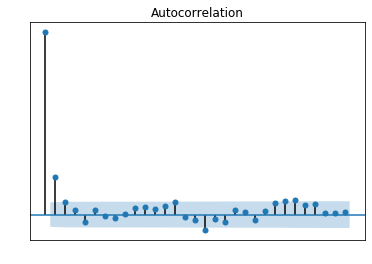

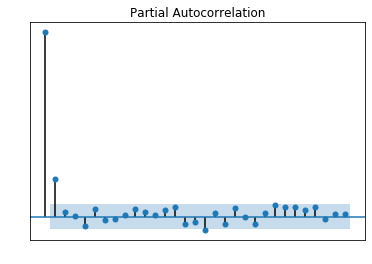

In [4]:
ACF = smt.stattools.acf(ts)
PACF=smt.stattools.pacf(ts)
print(ACF)
print(PACF)
plot_acf(ts)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(ts)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

不管是从数据还是从图中都可以直观看出，延迟一阶的自相关系数和偏自相关系数都显著大于零，而且从图中可以看出，ACF和PACF都具有明显的一阶之后的截尾性，因此可能是AR模型也可能是MA模型，下面对它们进行参数的估计。

In [5]:
# AR模型参数估计
max_lag = 30        # 设置最大延迟阶数
resultAR = smt.AR(ts).fit(maxlag=max_lag, ic='bic', trend='nc')
est_order = smt.AR(ts).select_order(maxlag=max_lag,ic='aic', trend='nc')
print(f'NAO拟合AR模型的参数：{resultAR.params.round(2)}')
print(f'NAO拟合AR模型的最佳滞后阶数 {est_order}')
print(resultAR.summary())

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


NAO拟合AR模型的参数：[0.21]
NAO拟合AR模型的最佳滞后阶数 1
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                  846
Model:                          AR(1)   Log Likelihood               -1197.381
Method:                          cmle   S.D. of innovations              0.998
Date:                Sat, 15 Aug 2020   AIC                              0.001
Time:                        23:41:03   BIC                              0.012
Sample:                             0   HQIC                             0.005
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.y           0.2056      0.034      6.107      0.000       0.140       0.272
                                    Roots                                    
              

因此，估计所得的模型是x[t]=0.21*x[t-1]+a[t]，根据此模型拟合数据，并对拟合的残差计算portmanteau统计量

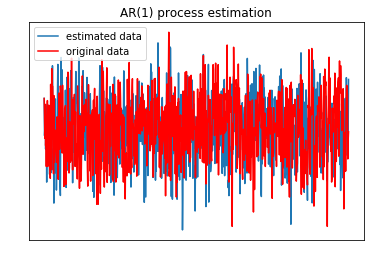

portmanteau统计量结果如下


,lb_stat,lb_pvalue
12,7.286611,0.838106


In [6]:
np.random.seed(7)
x=np.zeros(len(ts))
a=np.random.randn(len(ts))
x[0]=ts[0]
for t in range(1,len(ts)):
    x[t]=0.21*x[t-1]+a[t]
plt.plot(x,label="estimated data")
plt.plot(ts,"r",label="original data")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.title(label='AR(1) process estimation')
plt.legend()
plt.show()
print("portmanteau统计量结果如下")
sm.stats.acorr_ljungbox(resultAR.resid, lags=[12], return_df=True)

In [7]:
# MA模型参数估计
max_lag = 30        # 设置最大延迟阶数
resultMA = smt.ARMA(ts, order=(0, 1)).fit(maxlag=max_lag,method='mle', trend='nc')
print(resultMA.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  846
Model:                     ARMA(0, 1)   Log Likelihood               -1200.220
Method:                           mle   S.D. of innovations              1.000
Date:                Sat, 15 Aug 2020   AIC                           2404.439
Time:                        23:41:04   BIC                           2413.920
Sample:                             0   HQIC                          2408.072
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.1905      0.032      5.906      0.000       0.127       0.254
                                    Roots                                    
                  Real          Imaginary           M

从估计结果可以看出，得到的MA模型是y[t]=0.19*a[t-1]+a[t],根据此模型拟合数据

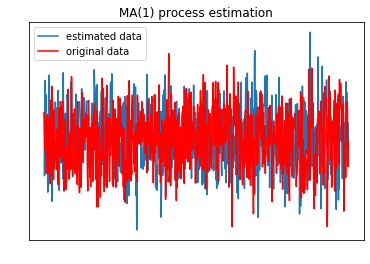

In [8]:
y=np.zeros(len(ts))
a=np.random.randn(len(ts))
y[0]=ts[0]
for t in range(1,len(ts)):
    y[t]=0.19*a[t-1]+a[t]
plt.plot(y,label="estimated data")
plt.plot(ts,"r",label="original data")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.title(label='MA(1) process estimation')
plt.legend()
plt.show()

计算portmanteau统计量也可以说明模型能够较好地描述数据

In [9]:
print("portmanteau统计量结果如下")
sm.stats.acorr_ljungbox(resultMA.resid, lags=[12], return_df=True)

portmanteau统计量结果如下


,lb_stat,lb_pvalue
12,10.273095,0.592016


### Example 3.2

读入数据，并做图查看。


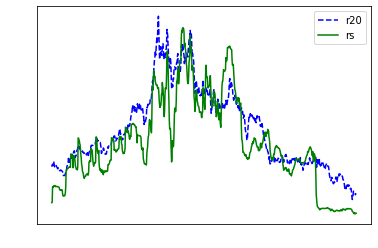

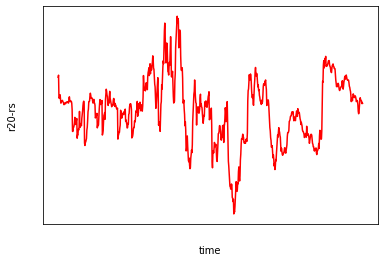

In [10]:
data1=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/r20.csv")
data2=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/rs.csv")
data=data1['r20']-data2['rs']
data=data.dropna(axis=0,how='all')
plt.plot(data1['r20'],'b--',label='r20')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.plot(data2['rs'],'g',label='rs')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.legend()
plt.show()
ts=np.zeros(len(data))
for i in range(len(data)):
    ts[i]=data[i]
plt.plot(ts,'r')
plt.ylabel('r20-rs')
plt.xlabel('time')
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()


可以看出，此分布的图像比白噪声平滑，也比NAO数据更为平滑。可以通过计算ACF和PACF来解释这一点，通过计算发现，ACF在12阶以内都是显著大于零。

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[1.         0.97413534 0.93767822 0.9008381  0.86499406 0.82830466
 0.78988687 0.75148544 0.71407957 0.68023812 0.65052813 0.62271084
 0.59529575 0.56681471 0.53907871 0.51060903 0.48416015 0.45805714
 0.43301256 0.40848195 0.38092575 0.35286851 0.33181616 0.31564771
 0.29827778 0.27969983 0.26284361 0.24997004 0.2422094  0.23619853
 0.22988274 0.2236078  0.21895999 0.21757759 0.2119254  0.20270567
 0.19090073 0.17823093 0.16607221 0.15413921 0.14177803]
[ 1.00000000e+00  9.75376276e-01 -2.32079942e-01  2.02815169e-02
 -5.61748000e-03 -4.66863091e-02 -4.82872418e-02 -7.90679356e-03
 -6.10324388e-03  4.64765595e-02  4.05091822e-02 -6.60581262e-03
 -1.69701071e-02 -4.40017309e-02  1.44180510e-03 -4.96073115e-02
  3.47316681e-02 -2.63889642e-02  1.49408604e-02 -1.06295982e-02
 -8.79120784e-02 -7.00817018e-03  1.33634500e-01  1.97296518e-02
 -6.87030557e-02 -7.61644085e-03  2.69451010e-02  4.87947999e-02
  6.07142169e-02 -9.85009553e-03 -1.49895812e-02  2.17026427e-02
  2.78656337e-02  4.1

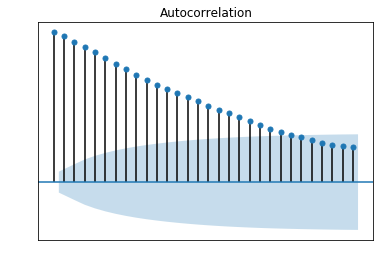

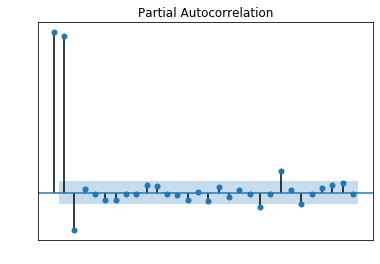

In [11]:
ACF = smt.stattools.acf(ts)
PACF=smt.stattools.pacf(ts)
print(ACF)
print(PACF)
plot_acf(ts)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(ts)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
# JB=stats.jarque_bera(ts)
# print('JB统计量为:',JB[0])
# print('JB检验的p值为:',JB[1])
# print('时间序列的adf检验',statsmodels.tsa.stattools.adfuller(ts))

计算所得的PACF在一阶和二阶都是显著的，此后截尾，因此考虑该序列可能是AR(2)过程，用MLE准测拟合得到的结果如下：

In [12]:
# AR(2)参数估计
resultAR = AutoReg(ts, 2).fit()
resultAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  786
Model:                     AutoReg(2)   Log Likelihood                -381.018
Method:               Conditional MLE   S.D. of innovations              0.393
Date:                Sat, 15 Aug 2020   AIC                             -1.856
Time:                        23:41:05   BIC                             -1.832
Sample:                             2   HQIC                            -1.847
                                  786                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0358      0.017      2.124      0.034       0.003       0.069
y.L1           1.1928      0.035     34.277      0.000       1.125       1.261
y.L2          -0.2242      0.035     -6.448      0.000      -0.292      -0.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0427           +0.0000j            1.0427            0.0000
AR.2            4.2767           +0.0000j            4.2767            0.0000
-----------------------------------------------------------------------------
"""

可以看出，拟合所得的AR(2)模型是x[t]=0.036+1.193*x[t-1]-0.224*x[t-2]+a[t]，或者也可以写成均值为0的序列的形式：x[t]-1.14=1.193*(x[t-1]-1.14)-0.224*(x[t-2]-1.14)+a[t]。根据AR(2)平稳的条件可以判断出该AR(2)过程是平稳的。

In [13]:
phi1=1.193
phi2=-0.224
print("phi1+phi2=",phi1+phi2)
print("-phi1+phi2=",-phi1+phi2)
print("phi2=",phi2)
print("二次方程判别式phi1^2+4*phi2=",phi1**2+4*phi2)

phi1+phi2= 0.9690000000000001
-phi1+phi2= -1.417
phi2= -0.224
二次方程判别式phi1^2+4*phi2= 0.5272490000000002


拟合曲线如下：


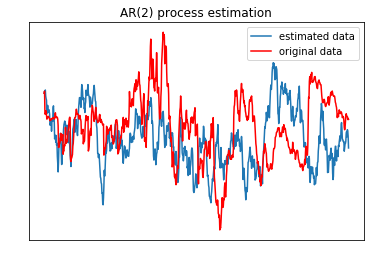

In [14]:
np.random.seed(7)
x=np.zeros(len(ts))
a=np.random.randn(len(ts))*0.394
x[0]=ts[0]
x[1]=ts[1]
for t in range(2,len(ts)):
    x[t]=0.036+1.193*x[t-1]-0.224*x[t-2]+a[t]
plt.plot(x,label="estimated data")
plt.plot(ts,"r",label="original data")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.title(label='AR(2) process estimation')
plt.legend()
plt.show()

计算残差的portmanteau统计量如下，渐近分布于卡方10，因此AR模型是合适的。

In [15]:
sm.stats.acorr_ljungbox(resultAR.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,7.567515,0.817949


也可以尝试一些过拟合的模型，比如AR(3)和ARMA(2,1)来看一下模型的效果

In [16]:
# AR(3)参数估计
resultAR3 = AutoReg(ts, 3).fit()
print("AR(3)参数估计结果：")
print(resultAR3.summary())
# ARMA(2,1)模型参数估计
max_lag = 30        # 设置最大延迟阶数
resultARMA = smt.ARMA(ts, order=(2, 1)).fit(maxlag=max_lag,method='mle', trend='nc')
print("ARMA(2,1)参数估计结果：")
print(resultARMA.summary())


AR(3)参数估计结果：
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  786
Model:                     AutoReg(3)   Log Likelihood                -376.127
Method:               Conditional MLE   S.D. of innovations              0.391
Date:                Sat, 15 Aug 2020   AIC                             -1.864
Time:                        23:41:06   BIC                             -1.835
Sample:                             3   HQIC                            -1.853
                                  786                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0363      0.017      2.157      0.031       0.003       0.069
y.L1           1.1943      0.036     33.627      0.000       1.125       1.264
y.L2          -0.2239      0.055     -4

可以明显的看出，AR(3)和ARMA(2,1)模型比原来模型增加的参数分别是-0.0009和0.0217，都不显著，因此原来的AR(2)模型就是能反映原数据的模型。

### Example 3.3

读入sunspot数据，并作图查看

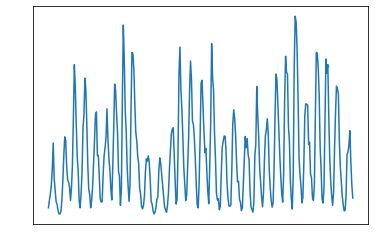

In [17]:
sunspot=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/sunspot.csv")
plt.plot(sunspot['sunspot'])
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
sunspot=sunspot["sunspot"]

可以大致看出具有一定的周期性，作图查看ACF和PACF，发现它们都是周期性震荡的，并逐渐衰减

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


[ 1.          0.813871    0.43240776  0.00896325 -0.31608955 -0.47161221
 -0.42576845 -0.20671579  0.11306195  0.43420219  0.63252804  0.63819825
  0.45512652  0.16042054 -0.13520755 -0.34522376 -0.41655271 -0.35534788
 -0.18908865  0.04107228  0.25550961  0.39259585  0.40190972  0.26953356
  0.03904621 -0.19642137 -0.37251289 -0.43069688 -0.35259811 -0.18572163
  0.01484629  0.1899754   0.28753378  0.26252255  0.12547971 -0.07260882
 -0.25878028 -0.35787774 -0.34661578 -0.23509061 -0.07467291]
[ 1.          0.81643842 -0.69408376 -0.15121472  0.01654263 -0.01999588
  0.15221712  0.19096555  0.22267772  0.23691552  0.0186947   0.00278571
 -0.01989639 -0.01065554  0.03496036 -0.06257476 -0.05786966 -0.16281633
 -0.1047265   0.05289895 -0.04315664  0.09885863  0.01326865 -0.13029304
 -0.07303455  0.00893538 -0.10648165  0.07810005  0.07400458 -0.12367183
 -0.02849503 -0.0193206  -0.00389846 -0.05754737  0.00264726 -0.00735394
 -0.02620042  0.07791784 -0.02914863  0.05128345  0.01575756]


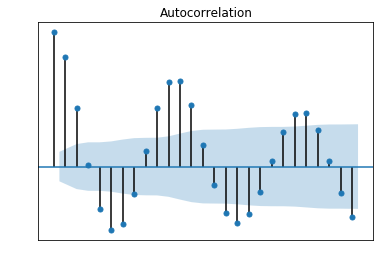

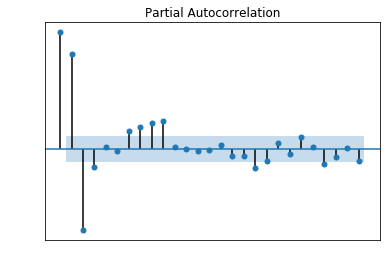

In [18]:
ACF = smt.stattools.acf(sunspot)
PACF=smt.stattools.pacf(sunspot)
print(ACF)
print(PACF)
plot_acf(sunspot)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plot_pacf(sunspot)
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

In [19]:
resultAR = AutoReg(ts, 2).fit()
resultAR.summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  786
Model:                     AutoReg(2)   Log Likelihood                -381.018
Method:               Conditional MLE   S.D. of innovations              0.393
Date:                Sat, 15 Aug 2020   AIC                             -1.856
Time:                        23:41:07   BIC                             -1.832
Sample:                             2   HQIC                            -1.847
                                  786                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0358      0.017      2.124      0.034       0.003       0.069
y.L1           1.1928      0.035     34.277      0.000       1.125       1.261
y.L2          -0.2242      0.035     -6.448      0.000      -0.292      -0.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0427           +0.0000j            1.0427            0.0000
AR.2            4.2767           +0.0000j            4.2767            0.0000
-----------------------------------------------------------------------------
"""